### Hardy-Weinberg Equilibrium and the evolution of a diploid population
The Hardy-Weinberg equilibrium is a fundamental concept in population genetics that describes the relationship between **genotype** and **allele** frequencies in a population. It states that when the population is large (no drift), mating is random and there is no mutation, selection, or migration, the frequency of alleles in a population will remain constant from generation to generation. Deviations from the Hardy-Weinberg equilibrium can be caused by various evolutionary forces, such as genetic drift, selection, mutation, and migration. By studying the patterns and causes of such deviations, researchers can gain insights into the evolutionary history and dynamics of populations.

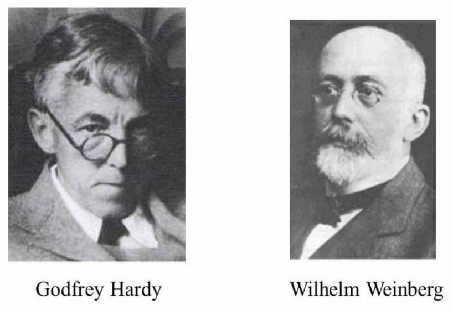  

The equilibrium can be described mathematically using the **Hardy-Weinberg equation**, which predicts the expected frequency of genotypes in a population based on the frequencies of alleles.    
  
Lets assume a single locus with alleles, A and a, and associated allelic fequencies, p and q, respectively. The expected frequencies of homozygous and heterogzygous individuals in the population can be easily derived using Punnet square: 

|       |   A (p)   |   a (q)  |
| ----- | ----- | ----- |
| A (p) | AA (pp) | Aa (pq) |
| a (q) | Aa (pq) | aa (qq) |

with the frequencies of AA, Aa, aa:

$$f(AA) = p^2$$
$$f(Aa) = pq + pq$$
$$f(aa) = q^2$$

Since the total of all frequencies equals 1, the Hardy-Weinberg equation is:
  
$$p^2 + 2pq + q^2 = 1$$
where $p$ and $q$ are the frequencies of two alleles at a single locus, and $p^2$, $2pq$, and $q^2$ are the expected frequencies of the three possible genotypes.






In [414]:
# We can formulate functions that calculate the expected genotype frequencies under Hardy-Weinberg equilibrium using p as input

def f_AA_expected(p):
    return p**2

def f_Aa_expected(p):
    return 2*p*(1-p)

def f_aa_expected(p):
    return (1-p)**2

In [415]:
#Given a allele frequence p = 0.5, what are the genotype frequencies
p = 0.5
print('freq(AA) = '+ str(f_AA_expected(p)))
print('freq(Aa) = '+ str(f_Aa_expected(p)))
print('freq(aa) = '+ str(f_aa_expected(p)))

freq(AA) = 0.25
freq(Aa) = 0.5
freq(aa) = 0.25


Lets visualize this relationschip between p and the genotype frequencies of AA, Aa, and aa using `numpy.linspace()` to generate a list of evenly spaced numbers over a specified interval (here between 0 and 1) and `matplotlib.pyplot` to plot our results.


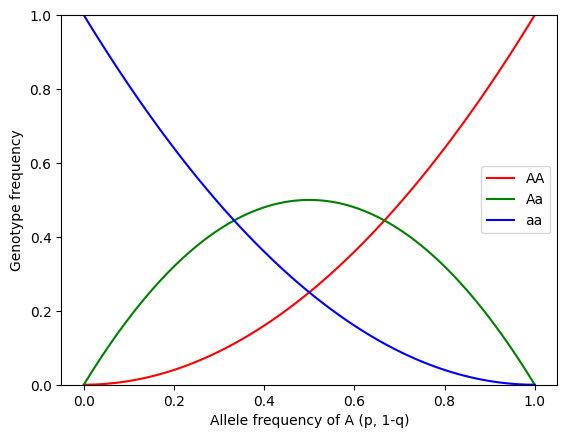

In [416]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of allele frequencies
p = np.linspace(0, 1, 100)

# Plot the expected genotype frequencies as a function of allele frequency
fig, ax = plt.subplots()
ax.plot(p, [f_AA_expected(_p) for _p in p], 'r-', label='AA')
ax.plot(p, [f_Aa_expected(_p) for _p in p], 'g-', label='Aa')
ax.plot(p, [f_aa_expected(_p) for _p in p], 'b-', label='aa')
ax.set_xlabel('Allele frequency of A (p, 1-q)')
ax.set_ylabel('Genotype frequency')
ax.set_ylim(0, 1)
ax.legend()

### Simulating Evolution and Exploring Hardy-Weinberg principles
Here, we will build code to simulate evolution and explore the principles of Hardy-Weinberg equilibrium. This will allow us to set various parameters, such as population size, generation time, and selection coefficients, and examine how these factors affect the genetic structure of populations.

The simulation is defined by a function named `simulate_HW`. The function takes four arguments:

- `pop_size`: An integer representing the population size.
- `generations`: An integer representing the number of generations to simulate.
- `start_p`: A float representing the initial frequency of allele A in the population.
- `W_genotypes`: A list of three number between 0 and 1 representing the fitness of the three genotypes (AA, Aa, aa) in the population.

The function first calculates the weights for each genotype (`['AA', 'Aa', 'aa']`) based on the initial frequency of allele A (`start_p`). It uses these weights to randomly generate the initial population using the `random.choices` function.

The function then enters a loop that simulates each generation. In each generation, the function shuffles the population randomly and creates a new population by randomly pairing individuals from the previous generation and crossing them over to create new individuals. The function then calculates the fitness of each individual based on the fitness values in `W_genotypes` and randomly selects individuals to survive based on their fitness.

As output, it calculates the frequencies of the different genotypes and alleles in the population each round and appends these frequencies to an output list named `output_population`. After the loop has completed for the specified number of generations, the function returns the output list `output_population`.


In [423]:
import random
import numpy as np
from scipy.stats import truncnorm

def simulate_HW(pop_size, generations, start_p, W_genotypes):
    # Set initial parameters
    pop_size = pop_size              # population size
    genotypes = ['AA','Aa','aa']     # possible genotypes in the population
    W_AA, W_Aa, W_aa = W_genotypes   # fitness values for each genotype
    p = start_p                      # initial frequency of allele A
    _weight = [p*p, 2*p*(1-p), (1-p)**2]  # calculate genotype frequencies based on allele frequency
    Population = random.choices(genotypes,weights = _weight, k = pop_size)  # generate initial population
    
    # Iterate over generations
    generations = generations
    output_population = []           # store the population frequencies after each generation
    K = pop_size                     # K: carrying capacity. 
    for gen in range(generations):

        Pop_len = len(Population)    # get the current population size
        
        # Calculate genotype and allele frequencies in the population
        freq_AA = Population.count('AA') / Pop_len
        freq_aa = Population.count('aa')/ Pop_len
        freq_Aa = (Population.count('Aa') + Population.count('aA')) / Pop_len
        freq_A = ''.join(Population).count('A') / (Pop_len*2)
        freq_a = ''.join(Population).count('a') / (Pop_len*2)
        
        output_population.append((freq_AA, freq_aa, freq_Aa, freq_A, freq_a)) # Add the frequencies to the output list
        
        # Generate new population by randomly mating individuals in the current population. Each couple has 4 offspring.
        random.shuffle(Population)   # shuffle the population for random mating
        Population = [''.join(random.sample((list(p1)),len(list(p1))))[0]+
                        ''.join(random.sample((list(p2)),len(list(p2))))[1] for p1, p2 in zip(Population[::2]*4, 
                                                                            Population[1::2]*4)]
        
        # Update the population by selecting individuals based on their fitness values
        new_pop = []

        f_AA = W_AA  * 1/((Pop_len/K)*2) #fitness is multiplied by 1/((Pop_len/K)*2) limiting growth beyond K. If Pop_len = K, f_AA = 0
        f_aa = W_aa * 1/((Pop_len/K)*2)
        f_Aa = W_Aa * 1/((Pop_len/K)*2)
        
        for indiv in Population:
            r = random.random()
            if indiv == 'AA':
                if r < f_AA:
                    new_pop.append(indiv)
            elif indiv == 'aa':
                if r < f_aa:
                    new_pop.append(indiv)
            else:
                if r < f_Aa:
                    new_pop.append(indiv)
        Population = new_pop
    
    # Return the population frequencies for each generation
    return output_population


#### Effect of drift
In population genetics, genetic drift refers to the random fluctuations in allele frequencies that occur in a population from one generation to the next due to chance events. The effects of drift on genetic variation depend on the size of the population.

In a population of infinite size, allele frequencies would remain constant over generations under the Hardy-Weinberg equilibrium. However, in a finite population, random fluctuations in allele frequencies can occur due to the sampling of gametes from the gene pool to form the next generation. This can lead to the loss or fixation of alleles, particularly in small populations.

As the population size decreases, genetic drift becomes more pronounced. In small populations, the frequency of alleles can change rapidly due to random sampling. Rare alleles are more likely to be lost, and the rate of fixation is higher. In contrast, in large populations, genetic drift has less of an effect because the random fluctuations in allele frequencies are small relative to the total number of individuals in the population.

In Hardy-Weinberg simulations, varying the population size can therefore have a significant effect on the outcomes of the simulation. Simulations with smaller populations will tend to show greater fluctuations in allele frequencies due to drift, while simulations with larger populations will tend to show more stable allele frequencies over time.

Let's explore this by simulating the allele frequences of populations with different sizes.

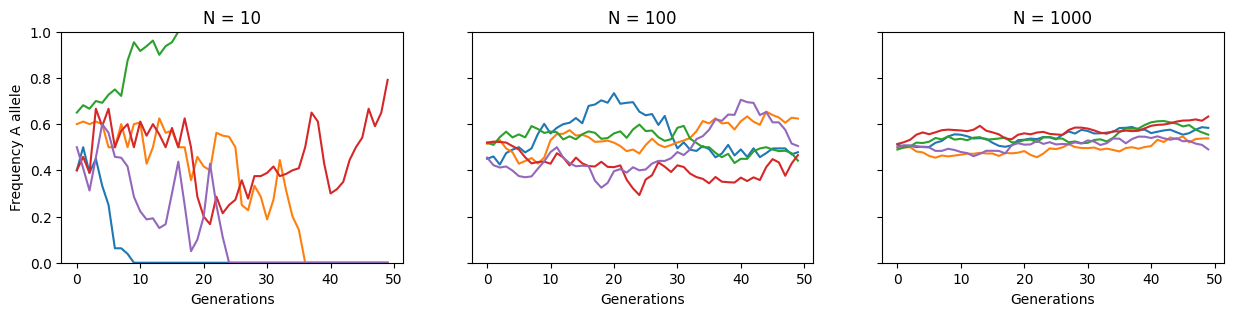

In [424]:
fig, ax = plt.subplots(1,3,  sharey=True,  figsize=(15, 3))
ax[0].set_ylabel('Frequency A allele')
i = 0
for pop_size in [10,100,1000]:
    for replicate_line in range(5):
        output_population = simulate_HW(pop_size, 50, 0.5, [1,1,1])

        freq_AA, freq_aa, freq_Aa, freq_A, freq_a = np.array(output_population).T


        ax[i].plot(range(len(output_population)), freq_A, label='N '+str(pop_size))
    ax[i].set_xlabel('Generations')
    ax[i].title.set_text('N = '+str(pop_size))
    ax[i].set_ylim(0, 1)


    i += 1



#### Effect of selection
Selection refers to the differential survival and reproduction of individuals with different genotypes. The effects of selection on genetic variation depend on the strength of selection, as well as the population size and other factors.

Let's now simulate the effect of selection. We can do this by changing the fitness of one genotype. By lowering the fitness of the homozygous recessive genotype (`aa`) we can explore to what extent this affects the Hardy-weinberg equilibrium and the evolutionary outcome of these simulations.


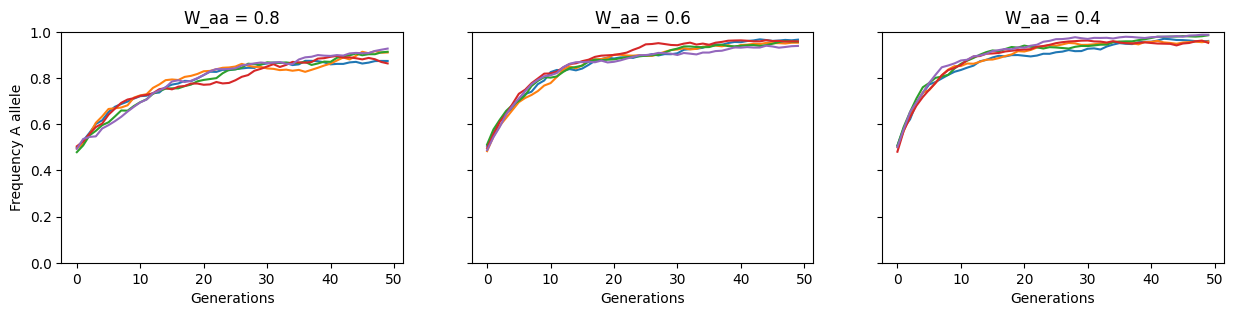

In [429]:
fig, ax = plt.subplots(1,3,  sharey=True,  figsize=(15, 3))
ax[0].set_ylabel('Frequency A allele')
i = 0
for W_aa in [0.8,0.6,0.4]:
    for replicate_line in range(5):
        output_population = simulate_HW(1000, 50, 0.5, [1,1,W_aa])

        freq_AA, freq_aa, freq_Aa, freq_A, freq_a = np.array(output_population).T


        ax[i].plot(range(len(output_population)), freq_A, label='N '+str(pop_size))
    ax[i].set_xlabel('Generations')
    ax[i].title.set_text('W_aa = '+str(W_aa))
    ax[i].set_ylim(0, 1)


    i += 1


The effect of selection on Hardy-Weinberg simulations depends on the population size. In small populations, genetic drift can strongly interact with the effects of selection, leading to unpredictable outcomes. In large populations, the effects of selection become the dominant force shaping the genetic structure of the population, and the effects of genetic drift are limited.

Next, we simulate selection for the A allele at different population sizes.

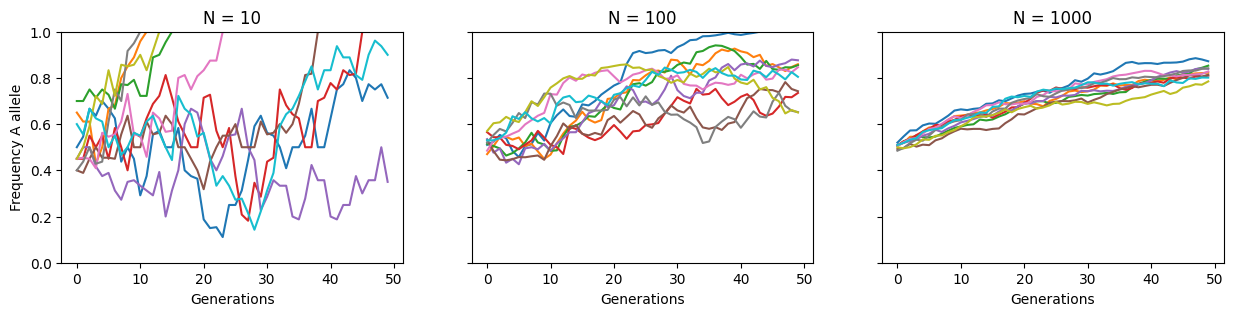

In [428]:
fig, ax = plt.subplots(1,3,  sharey=True,  figsize=(15, 3))
ax[0].set_ylabel('Frequency A allele')
i = 0
for pop_size in [10,100,1000]:
    for replicate_line in range(10):
        output_population = simulate_HW(pop_size, 50, 0.5, [1,1,0.9])

        freq_AA, freq_aa, freq_Aa, freq_A, freq_a = np.array(output_population).T


        ax[i].plot(range(len(output_population)), freq_A, label='N '+str(pop_size))
    ax[i].set_xlabel('Generations')
    ax[i].title.set_text('N = '+str(pop_size))
    ax[i].set_ylim(0, 1)


    i += 1


#### Effect of mutation and migration
Migration and mutation are two other important factors that can affect the genetic variation and structure of populations in Hardy-Weinberg simulations.

Migration refers to the movement of individuals between populations. When individuals migrate from one population to another, they bring with them their genetic variation, which can change the genetic structure of the recipient population. If the migrants have a different allele frequency or genetic structure than the recipient population, migration can increase the genetic diversity of the recipient population and reduce the genetic differences between populations.

Mutation, on the other hand, is the source of new genetic variation from within a population. In a model with just one locus and 2 alleles, the effect of mutation is modelled by allowing alleles to randomly shift, from `a` to `A`, and vice versa.

In Hardy-Weinberg simulations, the effects of migration and mutation depend on their rates and the population size. In small populations, the effects of migration and mutation are more pronounced, and genetic drift can interact with these forces to shape the genetic variation and structure of populations. In large populations, the effects of migration and mutation are typically smaller, and selection is more likely to be the dominant force shaping the genetic structure of populations.

Both migration and mutation, can lead to Migration-Selection or Mutation-Selection balance, which can constrain or prevent fixation. Note, however, that migration introduces two alleles per migratory event, wehereas each mutation event only introduce one new allele.

Let's first modify our code to allow for migration and mutation.

In [438]:
import random
import numpy as np

def simulate_HW_migration_mutation(pop_size, generations, start_p, W_genotypes,mig_rate, mu_rate):
    # Set initial parameters
    pop_size = pop_size              # population size
    genotypes = ['AA','Aa','aa']     # possible genotypes in the population
    W_AA, W_Aa, W_aa = W_genotypes   # fitness values for each genotype
    p = start_p                      # initial frequency of allele A
    _weight = [p*p, 2*p*(1-p), (1-p)**2]  # calculate genotype frequencies based on allele frequency
    Population = random.choices(genotypes,weights = _weight, k = pop_size)  # generate initial population
    migration_pop_structure = [1, 1, 1] #Probability of 'AA','Aa','aa' in the source population
    
    # Iterate over generations
    generations = generations
    output_population = []           # store the population frequencies after each generation
    K = pop_size                     # carying capacity
    for gen in range(generations):

        Pop_len = len(Population)    # get the current population size
        
        # Calculate genotype and allele frequencies in the population
        freq_AA = Population.count('AA') / Pop_len
        freq_aa = Population.count('aa')/ Pop_len
        freq_Aa = (Population.count('Aa') + Population.count('aA')) / Pop_len
        freq_A = ''.join(Population).count('A') / (Pop_len*2)
        freq_a = ''.join(Population).count('a') / (Pop_len*2)
        
        # Add the frequencies to the output list
        output_population.append((freq_AA, freq_aa, freq_Aa, freq_A, freq_a))
        
        # Generate new population by randomly mating individuals in the current population
        random.shuffle(Population)   # shuffle the population for random mating
        Population = [''.join(random.sample((list(p1)),len(list(p1))))[0]+
                        ''.join(random.sample((list(p2)),len(list(p2))))[1] for p1, p2 in zip(Population[::2]*4, 
                                                                            Population[1::2]*4)]
        # Create a new population by selecting individuals based on their fitness values
        new_pop = []
        # noise = 0.1
        # a , b = 0 , 1
        # _W_AA= np.random.normal(loc=W_AA, scale=noise, size=1)[0]
        # _W_Aa= np.random.normal(loc=W_Aa, scale=noise, size=1)[0]
        # _W_aa= np.random.normal(loc=W_aa, scale=noise, size=1)[0]

        f_AA = W_AA  * 1/((Pop_len/K)*2)
        f_aa = W_aa * 1/((Pop_len/K)*2)
        f_Aa = W_Aa * 1/((Pop_len/K)*2)
        
        for indiv in Population:
            # Introduce mutations
            mut_indiv = indiv
            for i in range(2):
                if random.random() < mu_rate:
                    if mut_indiv[i] == 'A':
                        mut_indiv = mut_indiv[:i] + 'a' + mut_indiv[i+1:]
                    else:
                        mut_indiv = mut_indiv[:i] + 'A' + mut_indiv[i+1:]
                        
            r = random.random()
            if mut_indiv == 'AA':
                if r < f_AA:
                    new_pop.append(mut_indiv)
            elif mut_indiv == 'aa':
                if r < f_aa:
                    new_pop.append(mut_indiv)
            else:
                if r < f_Aa:
                    new_pop.append(mut_indiv)

        # Introduce migrants
        Pop_len = len(new_pop)
        num_migrants = np.random.binomial(Pop_len, mig_rate)
        for i in range(num_migrants):
            # Create a migrant individual
            migrant = random.choices(genotypes, weights=migration_pop_structure)[0]
            new_pop.append(migrant)

        Population = new_pop

    return output_population


In the updated code, we have implemented the effect of migration and mutation on the population. 

Migration is introduced by adding individuals from an outside population to the current population. The number of migrants is determined using a binomial distribution, where the probability of success is the migration rate and the number of trials is the current population size. The genetic structure of the source poppulation can be set by changing `migration_pop_structure`, which determines the frequency of `'AA','Aa','aa'` in the source population.

Mutation is implemented by randomly changing alleles given a specific `mutation_rate`. Mutations `A` to `a` are equally likely as `a` to `A`.  

We will now use this updated function, `simulate_HW_migration_mutation`, to explore the effects of mutation and migration on the population dynamics.


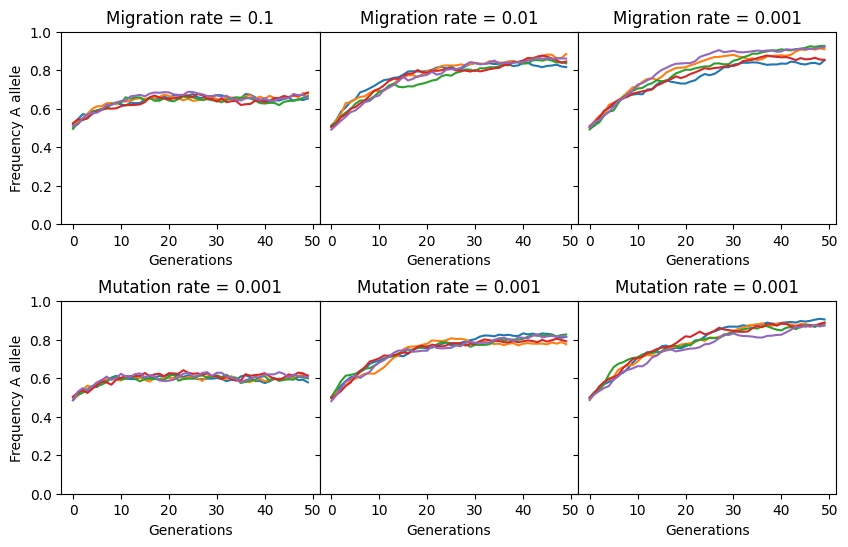

In [448]:
fig, ax = plt.subplots(2,3,  sharey=True,  figsize=(10, 6))
plt.subplots_adjust(wspace=0.0, hspace=0.4)
ax[0,0].set_ylabel('Frequency A allele')
ax[1,0].set_ylabel('Frequency A allele')
i = 0
for mig_rate in [0.1,0.01,0.001]:
    for replicate_line in range(5):
        output_population = simulate_HW_migration_mutation(1000, 50, 0.5, [1,1,0.8],mig_rate=mig_rate, mu_rate=0)

        freq_AA, freq_aa, freq_Aa, freq_A, freq_a = np.array(output_population).T


        ax[0,i].plot(range(len(output_population)), freq_A)
    ax[0,i].set_xlabel('Generations')
    ax[0,i].title.set_text('Migration rate = '+str(mig_rate))
    ax[0,i].set_ylim(0, 1)
    i += 1

i = 0
for mu_rate in [0.1,0.01,0.001]:
    for replicate_line in range(5):
        output_population = simulate_HW_migration_mutation(1000, 50, 0.5, [1,1,0.8],mig_rate=0, mu_rate=mu_rate)

        freq_AA, freq_aa, freq_Aa, freq_A, freq_a = np.array(output_population).T


        ax[1,i].plot(range(len(output_population)), freq_A)
    ax[1,i].set_xlabel('Generations')
    ax[1,i].title.set_text('Mutation rate = '+str(mu_rate))
    ax[1,i].set_ylim(0, 1)


    i += 1

Mutation and migration have very similar effects on the population structure. By continuously introducing new individuals to the population, deleterious alleles, here `a`, can be retained in the population and, `A`, will not reach fixation. Depending on the selection coefficient and mutation/migration rate, the alleles will be in mutation-selection or migration-selection balance. This balance will again be affected by genetic drift (you can explore this on your own).

### Recombination and HW equilibrium in a two-locus simulation

Recombination plays an important role in determining the frequency of alleles and genotypes in a population. When alleles are located on different chromosomes, recombination can create new combinations of alleles in the offspring.

In a two-locus simulation of Hardy-Weinberg equilibrium, the degree of linkage between the two loci determines the probability of recombination occurring between them, which is accounted for by the recombination rate. The recombination rate represents the probability that a recombination event will occur between the two loci during meiosis. As the recombination rate increases, the linkage between the two loci weakens, resulting in greater genetic diversity in the population. Conversely, when the recombination rate is low, the two loci are tightly linked, and the genetic diversity of the population is reduced.

By incorporating recombination into a two-locus Hardy-Weinberg simulation, we can model the effects of this fundamental genetic process on the distribution of genetic variation in a population. 

In [736]:
import random
import numpy as np

def simulate_HW_twolocus(pop_size, generations, start_p_A, W_genotypes_Aa, W_genotypes_Bb,mig_rate, mu_rate,rec_rate):
    # Set initial parameters
    pop_size = pop_size              # population size
    genotypes = ['AA','Aa','aa']     # possible genotypes in the population
    genotypes_2 = ['BB','Bb','bb']  
    rec_rate = rec_rate #recombination rate

    #genotypes_linked = [['AA', 'BB'], ['Aa', 'Bb'], ['aa', 'bb']]


    W_AA, W_Aa, W_aa = W_genotypes_Aa  # fitness values for each genotype
    W_BB, W_Bb, W_bb = W_genotypes_Bb
    p_A = start_p_A                      # initial frequency of allele A
    p_B = start_p_A #start_p_B                      # initial frequency of allele B
    _weight_A = [p_A*p_A, 2*p_A*(1-p_A), (1-p_A)**2]  # calculate genotype frequencies based on allele frequency
    _weight_B = [p_B*p_B, 2*p_B*(1-p_B), (1-p_B)**2]  # calculate genotype frequencies based on allele frequency
    Population_A = random.choices(genotypes,weights = _weight_A, k = pop_size)  # generate initial population
    Population_B = random.choices(genotypes_2,weights = _weight_B, k = pop_size)
    Population = [list(a) for a in zip(Population_A, Population_B)]

    #Population = random.choices(genotypes_linked,weights = _weight_A, k = pop_size)
    

    migration_pop_structure = ([1, 1, 1],[1, 1, 1]) #Probability of 'AA','Aa','aa' in the source population
    
    # Iterate over generations
    generations = generations
    output_population = []           # store the population frequencies after each generation
    K = pop_size                     # carying capacity
    for gen in range(generations):

        Pop_len = len(Population)    # get the current population size
        
        # Calculate genotype and allele frequencies in the population
        A_pop,B_pop = np.array(Population).T
        A_pop,B_pop = list(A_pop),list(B_pop)

        freq_AA = A_pop.count('AA') / Pop_len
        freq_aa = A_pop.count('aa')/ Pop_len
        freq_Aa = (A_pop.count('Aa') + A_pop.count('aA')) / Pop_len
        freq_A = ''.join(A_pop).count('A') / (Pop_len*2)
        freq_a = ''.join(A_pop).count('a') / (Pop_len*2)
        
        freq_BB = B_pop.count('BB') / Pop_len
        freq_bb = B_pop.count('bb')/ Pop_len
        freq_Bb = (B_pop.count('Bb') + B_pop.count('bB')) / Pop_len
        freq_B = ''.join(B_pop).count('B') / (Pop_len*2)
        freq_b = ''.join(B_pop).count('b') / (Pop_len*2)
        # Add the frequencies to the output list
        output_population.append((freq_AA, freq_aa, freq_Aa, freq_A, freq_a, freq_BB, freq_bb, freq_Bb, freq_B, freq_b))
        
        # Generate new population by randomly mating individuals in the current population
        random.shuffle(Population)   # shuffle the population for random mating

        new_generation = []
        for i in range(0, Pop_len, 2):
            p1 = Population[i] #e.g. ['Aa', 'Bb']
            p2 = Population[i+1]

            #parent 1 p1
            p1_gametes = []
            for _i in range(4): #number of gametes
                if random.random() < rec_rate:
                    _r = random.sample([[0,1],[1,0]],k=1)[0]
                    p1_gametes.append((p1[0][_r[0]], p1[1][_r[1]]))
                else:
                    if random.random() < 0.5:
                        p1_gametes.append((p1[0][0], p1[1][0]))
                    else: 
                        p1_gametes.append((p1[0][1], p1[1][1]))

            

            #parent 2 p2
            p2_gametes = []
            for _i in range(4): #number of gametes
                if random.random() < rec_rate:
                    _r = random.sample([[0,1],[1,0]],k=1)[0]
                    p2_gametes.append((p2[0][_r[0]], p2[1][_r[1]]))
                else:
                    if random.random() < 0.5:
                        p2_gametes.append((p2[0][0], p2[1][0]))
                    else: 
                        p2_gametes.append((p2[0][1], p2[1][1]))

            for offspring in range(4):
                new_individual = [p1_gametes[offspring][0]+ p2_gametes[offspring][0], p1_gametes[offspring][1]+ p2_gametes[offspring][1]]
                new_generation.append(new_individual)


        Population = new_generation


        # Create a new population by selecting individuals based on their fitness values
        new_pop = []

        f_AABB = sum((W_AA,W_BB))/2* 1/((Pop_len/K)*2)
        f_AABb = sum((W_AA,W_Bb))/2 * 1/((Pop_len/K)*2)
        f_AAbb = sum((W_AA,W_bb))/2 * 1/((Pop_len/K)*2)

        f_AaBB = sum((W_Aa,W_BB))/2 * 1/((Pop_len/K)*2)
        f_AaBb = sum((W_Aa,W_Bb))/2 * 1/((Pop_len/K)*2)
        f_Aabb = sum((W_Aa,W_bb))/2 * 1/((Pop_len/K)*2)

        f_aaBB = sum((W_aa,W_BB))/2 * 1/((Pop_len/K)*2)
        f_aaBb = sum((W_aa,W_Bb))/2 * 1/((Pop_len/K)*2)
        f_aabb = sum((W_aa,W_bb))/2 * 1/((Pop_len/K)*2)
       


        for indiv in Population:
            # Introduce mutations
            mut_indiv = indiv
            # for i in range(2):
            #     if random.random() < mu_rate:
            #         if mut_indiv[i] == 'A':
            #             mut_indiv = mut_indiv[:i] + 'a' + mut_indiv[i+1:]
            #         else:
            #             mut_indiv = mut_indiv[:i] + 'A' + mut_indiv[i+1:]
                        
            r = random.random()
            if mut_indiv[0]+mut_indiv[1] == 'AABB':
                if r < f_AABB:
                    new_pop.append(mut_indiv)
            elif mut_indiv[0]+mut_indiv[1] in ('AABb','AAbB') :
                if r < f_AABb:
                    new_pop.append(mut_indiv)
            elif mut_indiv[0]+mut_indiv[1] == 'AAbb':
                if r < f_AAbb:
                    new_pop.append(mut_indiv)  
            elif mut_indiv[0]+mut_indiv[1] in ('AaBB','aABB'):
                if r < f_AaBB:
                    new_pop.append(mut_indiv)
            elif mut_indiv[0]+mut_indiv[1]  in ('AaBb','AabB','aABb','aAbB'):
                if r < f_AaBb:
                    new_pop.append(mut_indiv) 
            elif mut_indiv[0]+mut_indiv[1] in ('Aabb','aAbb'):
                if r < f_Aabb:
                    new_pop.append(mut_indiv)
            elif mut_indiv[0]+mut_indiv[1] == 'aaBB':
                if r < f_aaBB:
                    new_pop.append(mut_indiv)    
            elif mut_indiv[0]+mut_indiv[1] in ('aaBb','aabB'):
                if r < f_aaBb:
                    new_pop.append(mut_indiv)
            elif mut_indiv[0]+mut_indiv[1] == 'aabb':
                if r < f_aabb:
                    new_pop.append(mut_indiv)    
                            
            else:
                print(ut_indiv[0]+mut_indiv[1])

        # # Introduce migrants
        # Pop_len = len(new_pop)
        # num_migrants = np.random.binomial(Pop_len, mig_rate)
        # for i in range(num_migrants):
        #     # Create a migrant individual
        #     migrant = random.choices(genotypes, weights=migration_pop_structure)[0]
        #     new_pop.append(migrant)

        if (len(new_pop)%2) == 0:
            pass
        else:
            del new_pop[-1]
        Population = new_pop


    return output_population


We will first simulate a situation with two loci, A and B, each with two alleles - A and a for locus A and B and b for locus B. The genetic makeup of the initial population is completely random, including the combination of alleles between both loci. 

Lets simulate what would happen if locus A determines fitness, with genotype `aa` being less fit compared to `AA` and `Aa`. Locus B does not contribute to fitness. but isnt genetically linked to locus A.

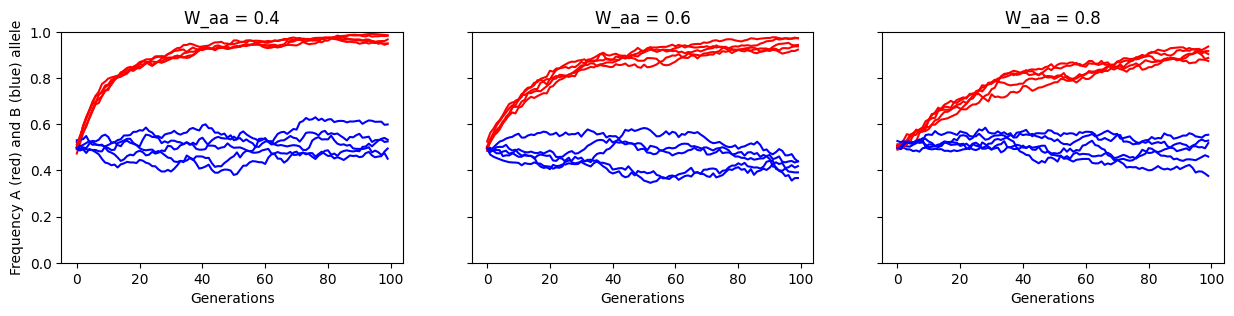

In [737]:
fig, ax = plt.subplots(1,3,  sharey=True,  figsize=(15, 3))
ax[0].set_ylabel('Frequency A (red) and B (blue) allele')
i = 0
for Waa in [0.4, 0.6, 0.8]:
    for replicate_line in range(5):
        output_population = simulate_HW_twolocus(1000, 100, 0.5, [1,1,Waa],[1,1,1],0,0,1)

        freq_AA, freq_aa, freq_Aa, freq_A, freq_a, freq_BB, freq_bb, freq_Bb, freq_B, freq_b = np.array(output_population).T


        ax[i].plot(range(len(output_population)), freq_A, 'red')
        ax[i].plot(range(len(output_population)), freq_B, 'blue')
    ax[i].set_xlabel('Generations')
    ax[i].title.set_text('W_aa = '+str(Waa))
    ax[i].set_ylim(0, 1)

    i += 1

In this simulation, locus B does not contribute to fitness, which means that it is selectively neutral. Therefore, the frequencies of the B (Blue) and b alleles at locus B will remain constant over time in the absence of other evolutionary forces such as genetic drift or mutation. The Hardy-Weinberg equilibrium equation can still be applied to locus B, and the frequencies of the B and b alleles will follow the same pattern as described earlier. As such, we can say that both loci are clearly in linkage equilibrium. 

Linkage equilibrium is a term used to describe the situation where the alleles at two or more loci in a population occur independently of one another. In other words, the frequency of alleles at one locus does not affect the frequency of alleles at another locus. This situation is expected under the assumptions of the Hardy-Weinberg equilibrium, where the genotype frequencies at each locus are determined solely by the allele frequencies and are independent of the other locus.


### Effect of recombination rate on loci in linkage disequilibrium
Let's now tighly link both loci to see how recombination affects when two loci are in linkage disequilibrium (LD). Loci can get in linkage disequilibrium when they are physically close together on a chromosome and do not assort independently during meiosis. This means that the alleles at the two loci are more likely to be inherited together than would be expected by chance. LD can arise due to several reasons, such as genetic drift, natural selection, and population admixture.

For example, if a population experiences a genetic bottleneck, where only a small subset of individuals contribute to the next generation, there may be a loss of genetic diversity, and certain alleles may become more common by chance. If these alleles are physically close together on a chromosome, they may remain in LD even as the population size recovers.

Alternatively, natural selection can also lead to LD. If a particular combination of alleles at two loci confers a fitness advantage or disadvantage, then those alleles may be more likely to be inherited together, leading to LD. Population admixture, where individuals from different populations interbreed, can also lead to LD if the populations have different allele frequencies at the two loci.

In this example, we imagine a large population bottleneck which resulted in ony three genotypes surviving, AABB, AaBb and aabb. Because A and B are tighly linked the recovering population's genetic variation is still only AABB, AaBb and aabb. What would happen if the environment changes and locus A contributes to fitness with aa being highly deleterious, while locus B remains neutral. Let's simulate this situation, with varying rates of recombination.

To do this, we will first make some changes to the `simulate_HW_twolocus` function.

In [738]:
import random
import numpy as np

def simulate_HW_twolocus(pop_size, generations, start_p_A, W_genotypes_Aa, W_genotypes_Bb,mig_rate, mu_rate,rec_rate):
    # Set initial parameters
    pop_size = pop_size              # population size
    genotypes = ['AA','Aa','aa']     # possible genotypes in the population
    genotypes_2 = ['BB','Bb','bb']  
    rec_rate = rec_rate #recombination rate

    genotypes_linked = [['AA', 'BB'], ['Aa', 'Bb'], ['aa', 'bb']]

    W_AA, W_Aa, W_aa = W_genotypes_Aa  # fitness values for each genotype
    W_BB, W_Bb, W_bb = W_genotypes_Bb
    p_A = start_p_A                      # initial frequency of allele A
    p_B = start_p_A #start_p_B                      # initial frequency of allele B
    _weight_A = [p_A*p_A, 2*p_A*(1-p_A), (1-p_A)**2]  # calculate genotype frequencies based on allele frequency
    _weight_B = [p_B*p_B, 2*p_B*(1-p_B), (1-p_B)**2]  # calculate genotype frequencies based on allele frequency


    Population = random.choices(genotypes_linked,weights = _weight_A, k = pop_size)
    

    migration_pop_structure = ([1, 1, 1],[1, 1, 1]) #Probability of 'AA','Aa','aa' in the source population
    
    # Iterate over generations
    generations = generations
    output_population = []           # store the population frequencies after each generation
    K = pop_size                     # carying capacity
    for gen in range(generations):

        Pop_len = len(Population)    # get the current population size
        
        # Calculate genotype and allele frequencies in the population
        A_pop,B_pop = np.array(Population).T
        A_pop,B_pop = list(A_pop),list(B_pop)

        freq_AA = A_pop.count('AA') / Pop_len
        freq_aa = A_pop.count('aa')/ Pop_len
        freq_Aa = (A_pop.count('Aa') + A_pop.count('aA')) / Pop_len
        freq_A = ''.join(A_pop).count('A') / (Pop_len*2)
        freq_a = ''.join(A_pop).count('a') / (Pop_len*2)
        
        freq_BB = B_pop.count('BB') / Pop_len
        freq_bb = B_pop.count('bb')/ Pop_len
        freq_Bb = (B_pop.count('Bb') + B_pop.count('bB')) / Pop_len
        freq_B = ''.join(B_pop).count('B') / (Pop_len*2)
        freq_b = ''.join(B_pop).count('b') / (Pop_len*2)
        # Add the frequencies to the output list
        output_population.append((freq_AA, freq_aa, freq_Aa, freq_A, freq_a, freq_BB, freq_bb, freq_Bb, freq_B, freq_b))
        
        # Generate new population by randomly mating individuals in the current population
        random.shuffle(Population)   # shuffle the population for random mating

        new_generation = []
        for i in range(0, Pop_len, 2):
            p1 = Population[i] #e.g. ['Aa', 'Bb']
            p2 = Population[i+1]

            #parent 1 p1
            p1_gametes = []
            for _i in range(4): #number of gametes
                if random.random() < rec_rate:
                    _r = random.sample([[0,1],[1,0]],k=1)[0]
                    p1_gametes.append((p1[0][_r[0]], p1[1][_r[1]]))
                else:
                    if random.random() < 0.5:
                        p1_gametes.append((p1[0][0], p1[1][0]))
                    else: 
                        p1_gametes.append((p1[0][1], p1[1][1]))

            

            #parent 2 p2
            p2_gametes = []
            for _i in range(4): #number of gametes
                if random.random() < rec_rate:
                    _r = random.sample([[0,1],[1,0]],k=1)[0]
                    p2_gametes.append((p2[0][_r[0]], p2[1][_r[1]]))
                else:
                    if random.random() < 0.5:
                        p2_gametes.append((p2[0][0], p2[1][0]))
                    else: 
                        p2_gametes.append((p2[0][1], p2[1][1]))

            for offspring in range(4):
                new_individual = [p1_gametes[offspring][0]+ p2_gametes[offspring][0], p1_gametes[offspring][1]+ p2_gametes[offspring][1]]
                new_generation.append(new_individual)


        Population = new_generation


        # Create a new population by selecting individuals based on their fitness values
        new_pop = []

        f_AABB = sum((W_AA,W_BB))/2* 1/((Pop_len/K)*2)
        f_AABb = sum((W_AA,W_Bb))/2 * 1/((Pop_len/K)*2)
        f_AAbb = sum((W_AA,W_bb))/2 * 1/((Pop_len/K)*2)

        f_AaBB = sum((W_Aa,W_BB))/2 * 1/((Pop_len/K)*2)
        f_AaBb = sum((W_Aa,W_Bb))/2 * 1/((Pop_len/K)*2)
        f_Aabb = sum((W_Aa,W_bb))/2 * 1/((Pop_len/K)*2)

        f_aaBB = sum((W_aa,W_BB))/2 * 1/((Pop_len/K)*2)
        f_aaBb = sum((W_aa,W_Bb))/2 * 1/((Pop_len/K)*2)
        f_aabb = sum((W_aa,W_bb))/2 * 1/((Pop_len/K)*2)
       


        for indiv in Population:
            # Introduce mutations
            mut_indiv = indiv
            # for i in range(2):
            #     if random.random() < mu_rate:
            #         if mut_indiv[i] == 'A':
            #             mut_indiv = mut_indiv[:i] + 'a' + mut_indiv[i+1:]
            #         else:
            #             mut_indiv = mut_indiv[:i] + 'A' + mut_indiv[i+1:]
                        
            r = random.random()
            if mut_indiv[0]+mut_indiv[1] == 'AABB':
                if r < f_AABB:
                    new_pop.append(mut_indiv)
            elif mut_indiv[0]+mut_indiv[1] in ('AABb','AAbB') :
                if r < f_AABb:
                    new_pop.append(mut_indiv)
            elif mut_indiv[0]+mut_indiv[1] == 'AAbb':
                if r < f_AAbb:
                    new_pop.append(mut_indiv)  
            elif mut_indiv[0]+mut_indiv[1] in ('AaBB','aABB'):
                if r < f_AaBB:
                    new_pop.append(mut_indiv)
            elif mut_indiv[0]+mut_indiv[1]  in ('AaBb','AabB','aABb','aAbB'):
                if r < f_AaBb:
                    new_pop.append(mut_indiv) 
            elif mut_indiv[0]+mut_indiv[1] in ('Aabb','aAbb'):
                if r < f_Aabb:
                    new_pop.append(mut_indiv)
            elif mut_indiv[0]+mut_indiv[1] == 'aaBB':
                if r < f_aaBB:
                    new_pop.append(mut_indiv)    
            elif mut_indiv[0]+mut_indiv[1] in ('aaBb','aabB'):
                if r < f_aaBb:
                    new_pop.append(mut_indiv)
            elif mut_indiv[0]+mut_indiv[1] == 'aabb':
                if r < f_aabb:
                    new_pop.append(mut_indiv)    
                            
            else:
                print(ut_indiv[0]+mut_indiv[1])

        # # Introduce migrants
        # Pop_len = len(new_pop)
        # num_migrants = np.random.binomial(Pop_len, mig_rate)
        # for i in range(num_migrants):
        #     # Create a migrant individual
        #     migrant = random.choices(genotypes, weights=migration_pop_structure)[0]
        #     new_pop.append(migrant)

        if (len(new_pop)%2) == 0:
            pass
        else:
            del new_pop[-1]
        Population = new_pop


    return output_population


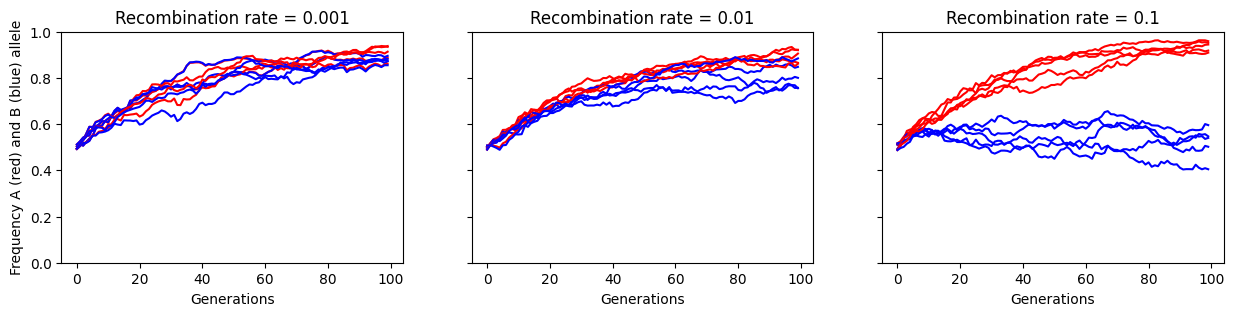

In [742]:
fig, ax = plt.subplots(1,3,  sharey=True,  figsize=(15, 3))
ax[0].set_ylabel('Frequency A (red) and B (blue) allele')
i = 0
for rec_rate in [0.001, 0.01, 0.1]:
    for replicate_line in range(5):
        output_population = simulate_HW_twolocus(1000, 100, 0.5, [1,1,0.8],[1,1,1],0,0,rec_rate)

        freq_AA, freq_aa, freq_Aa, freq_A, freq_a, freq_BB, freq_bb, freq_Bb, freq_B, freq_b = np.array(output_population).T


        ax[i].plot(range(len(output_population)), freq_A, 'red')
        ax[i].plot(range(len(output_population)), freq_B, 'blue')
    ax[i].set_xlabel('Generations')
    ax[i].title.set_text('Recombination rate = '+str(rec_rate))
    ax[i].set_ylim(0, 1)

    i += 1